In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 选择数据集
scenario_names = np.array([
    "city_18_denver", "city_15_indianapolis", "city_19_oklahoma",
    "city_12_fortworth", "city_11_santaclara", "city_7_sandiego"
])
scenario_idxs = np.array([0, 1, 2, 3, 4, 5])  # Select the scenario indexes
selected_scenario_names = scenario_names[scenario_idxs]

# 对数据进行标记
from input_preprocess import tokenizer
preprocessed_chs = tokenizer(
    selected_scenario_names=selected_scenario_names,  # Selects predefined DeepMIMOv3 scenarios_test. Set to None to load your own dataset.
    manual_data=None,  # If using a custom dataset, ensure it is a wireless channel dataset of size (N,32,32) based on the settings provided above.
    gen_raw=True  # Set gen_raw=False to apply masked channel modeling (MCM), as used in LWM pre-training. For inference, masking is unnecessary unless you want to evaluate LWM's ability to handle noisy inputs.
)

# 加载模型
from lwm_model import lwm
# 这里应为mps加速和cuda加速存在兼容问题(float类型不兼容)，所以在这里无法使用mps
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Loading the LWM model on {device}...")
model = lwm.from_pretrained(device=device)

# 进行推理
from inference import lwm_inference, create_raw_dataset
input_types = ['cls_emb', 'channel_emb', 'raw']
selected_input_type = input_types[0]  # Change the index to select LWM CLS embeddings, LWM channel embeddings, or the original input channels.

dataset = lwm_inference(preprocessed_chs, selected_input_type, model, device) if selected_input_type in ['cls_emb', 'channel_emb'] else create_raw_dataset(preprocessed_chs, device)

# 创建标签
from input_preprocess import create_labels
tasks = ['LoS/NLoS Classification', 'Beam Prediction']
task = tasks[1]  # Choose 0 for LoS/NLoS labels or 1 for beam prediction labels.
labels = create_labels(task, scenario_names, n_beams=16)  # For beam prediction, n_beams specifies the number of beams in the codebook.


Basestation 3

UE-BS Channels


Generating channels: 100%|██████████| 6970/6970 [00:00<00:00, 44372.31it/s]



Basestation 3

UE-BS Channels


Generating channels: 100%|██████████| 6320/6320 [00:00<00:00, 18127.94it/s]



Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 6150/6150 [00:00<00:00, 16089.46it/s]



Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 6192/6192 [00:00<00:00, 30507.86it/s]



Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 5358/5358 [00:00<00:00, 19183.54it/s]



Basestation 1

UE-BS Channels


Processing items: 100%|██████████| 14840/14840 [00:00<00:00, 46437.84it/s]
/Users/dianhongyang/Desktop/毕业设计/LWM_Model/LWM/lwm_model.py:122: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimenta

Loading the LWM model on cpu...
Model loaded successfully from /Users/dianhongyang/Desktop/毕业设计/LWM_Model/LWM/model_weights.pth to cpu
LWM loss: 0.0193

Basestation 3

UE-BS Channels


Computing the channel for each user: 100%|██████████| 6970/6970 [00:00<00:00, 234608.25it/s]



Basestation 3

UE-BS Channels


Computing the channel for each user: 100%|██████████| 6320/6320 [00:00<00:00, 105731.73it/s]



Basestation 1

UE-BS Channels


Computing the channel for each user: 100%|██████████| 6150/6150 [00:00<00:00, 102626.52it/s]



Basestation 1

UE-BS Channels


Computing the channel for each user: 100%|██████████| 6192/6192 [00:00<00:00, 168159.97it/s]



Basestation 1

UE-BS Channels


Computing the channel for each user: 100%|██████████| 5358/5358 [00:00<00:00, 103658.60it/s]



Basestation 1

UE-BS Channels


Computing the channel for each user: 100%|██████████| 5893/5893 [00:00<00:00, 139552.01it/s]


Duplicate key in file PosixPath('/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')
Duplicate key in file PosixPath('/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 271 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Gen

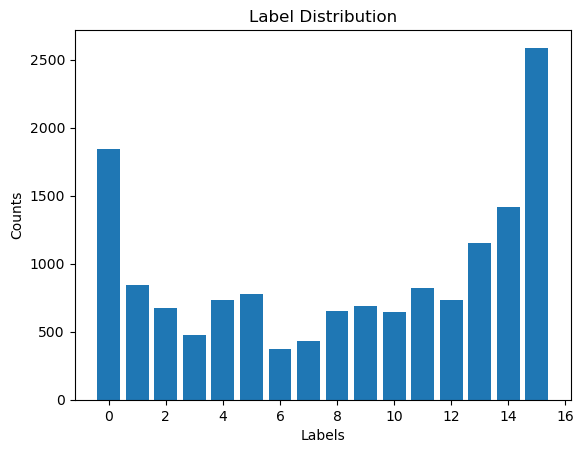

tensor([1842,  840,  672,  477,  730,  774,  371,  432,  650,  687,  646,  824,
         736, 1154, 1417, 2588])


In [2]:
# 可视化标签分布
labels = torch.tensor(labels)  # 确保是张量
unique_labels, counts = torch.unique(labels, return_counts=True)
import matplotlib.pyplot as plt
plt.bar(unique_labels.numpy(), counts.numpy())
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.show()
print(counts)

In [3]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import time
from torch.utils.tensorboard import SummaryWriter
from sklearn.preprocessing import StandardScaler
import torch
from torch.nn import Sequential, Conv1d, ReLU, Linear, CrossEntropyLoss, BatchNorm1d, Dropout, AdaptiveAvgPool1d
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# 数据转换为张量
dataset = torch.tensor(dataset, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)


# 从 Subset 中提取数据和标签并进行归一化
def normalize_and_extract(subset, dataset, labels, scaler=None, fit=False):
    indices = subset.indices if hasattr(subset, 'indices') else range(len(subset))
    data = torch.stack([dataset[i] for i in indices])
    label = torch.tensor([labels[i] for i in indices], dtype=torch.long)
    
    if fit:  # 如果需要拟合归一化器
        scaler.fit(data.numpy())
    
    normalized_data = torch.tensor(scaler.transform(data.numpy()), dtype=torch.float32)
    return normalized_data, label


# 初始化标准化器
scaler = StandardScaler()


# def downsample_classes(dataset, labels, target_class_counts, target_classes=[0, 14, 15]):
#     # 计算需要下采样的类别的索引
#     downsampled_indices = []
    
#     # 遍历目标类别
#     for target_class in target_classes:
#         class_indices = torch.where(labels == target_class)[0]
#         # 随机选择目标样本数
#         selected_indices = class_indices[torch.randperm(class_indices.size(0))[:target_class_counts]]
#         downsampled_indices.extend(selected_indices.numpy())
    
#     # 获取其他类别的样本
#     other_classes_indices = torch.where(~torch.isin(labels, torch.tensor(target_classes)))[0]
    
#     # 将下采样后的样本与其他类别样本合并
#     final_indices = torch.tensor(downsampled_indices + other_classes_indices.tolist(), dtype=torch.long)
#     final_dataset = dataset[final_indices]
#     final_labels = labels[final_indices]
    
#     return final_dataset, final_labels

# # 设置下采样后的目标类别样本数
# target_class_counts = 1154

# # 执行下采样
# downsampled_dataset, downsampled_labels = downsample_classes(dataset, labels, target_class_counts)

# # 打印处理后的样本数量
# print("Downsampled dataset size:", len(downsampled_dataset))
# print("Downsampled label distribution:", torch.bincount(downsampled_labels))

# 重新划分数据集
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# 从 Subset 中提取数据和标签并进行归一化
train_data, train_labels = normalize_and_extract(train_dataset, dataset, labels, scaler, fit=True)
val_data, val_labels = normalize_and_extract(val_dataset, dataset, labels, scaler, fit=False)
test_data, test_labels = normalize_and_extract(test_dataset, dataset, labels, scaler, fit=False)

# 创建 DataLoader
train_loader = DataLoader(TensorDataset(train_data, train_labels), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(val_data, val_labels), batch_size=64, shuffle=False)
test_loader = DataLoader(TensorDataset(test_data, test_labels), batch_size=64, shuffle=False)

Residual1DCNN(
  (conv1): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (res_block1): Sequential(
    (0): Conv1d(128, 256, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(256, 128, kernel_size=(5,), stride=(1,), padding=(2,))
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Dropout(p=0.5, inplace=False)
  )
  (res_block2): Sequential(
    (0): Conv1d(128, 256, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(256, 128, kernel_size=(5,), stride=(1,), padding=(2,))
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Dropout(p=0.5, inplace=False)
  )
  (res_block3): Sequential(
    (0): Conv1d(128, 256, kernel_size=(5,), stride=(1,), padding=(2

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following famil

Epoch 250/250, Train Loss: 88.8668, Train Acc: 0.8235, Val Loss: 22.0795, Val Acc: 0.7318, Val F1 Score: 0.7326
Test F1 Score: 0.7325


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following famil

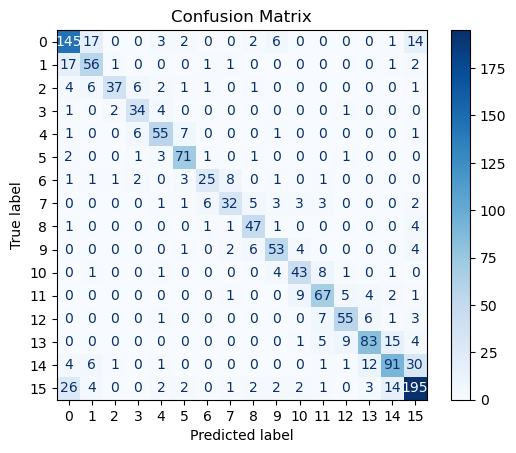

In [4]:

# # 定义 Residual1DCNN 模型
# class Residual1DCNN(torch.nn.Module):
#     def __init__(self, input_dim, n_beams):
#         super(Residual1DCNN, self).__init__()
#         self.conv1 = Conv1d(in_channels=input_dim, out_channels=256, kernel_size=5, padding=2)
        
#         # 残差块1
#         self.res_block1 = Sequential(
#             Conv1d(256, 512, kernel_size=5, padding=2),
#             BatchNorm1d(512),
#             ReLU(),
#             Conv1d(512, 256, kernel_size=5, padding=2),
#             BatchNorm1d(256),
#             Dropout(0.5)  # Dropout
#         )
        
#         # 残差块2
#         self.res_block2 = Sequential(
#             Conv1d(256, 512, kernel_size=5, padding=2),
#             BatchNorm1d(512),
#             ReLU(),
#             Conv1d(512, 256, kernel_size=5, padding=2),
#             BatchNorm1d(256),
#             Dropout(0.5)  # Dropout
#         )
        
#         # 残差块3
#         self.res_block3 = Sequential(
#             Conv1d(256, 512, kernel_size=5, padding=2),
#             BatchNorm1d(512),
#             ReLU(),
#             Conv1d(512, 256, kernel_size=5, padding=2),
#             BatchNorm1d(256),
#             Dropout(0.5)  # Dropout
#         )
        
#         self.global_avg_pool = AdaptiveAvgPool1d(1)
#         self.fc = Linear(256, n_beams)

#     def forward(self, x):
#         if x.ndim == 2:  # 检查输入维度
#             x = x.unsqueeze(-1)

#         x = self.conv1(x)
#         res1 = self.res_block1(x)
#         x = ReLU()(x + res1)
#         res2 = self.res_block2(x)
#         x = ReLU()(x + res2)
#         res3 = self.res_block3(x)
#         x = ReLU()(x + res3)
#         x = self.global_avg_pool(x).squeeze(-1)
#         x = self.fc(x)
#         return x




# 定义 Residual1DCNN 模型
class Residual1DCNN(torch.nn.Module):
    def __init__(self, input_dim, n_beams):
        super(Residual1DCNN, self).__init__()
        self.conv1 = Conv1d(in_channels=input_dim, out_channels=128, kernel_size=5, padding=2)
        
        # 残差块1
        self.res_block1 = Sequential(
            Conv1d(128, 256, kernel_size=5, padding=2),
            BatchNorm1d(256),
            ReLU(),
            Conv1d(256, 128, kernel_size=5, padding=2),
            BatchNorm1d(128),
            Dropout(0.5)  # Dropout
        )
        
        # 残差块2
        self.res_block2 = Sequential(
            Conv1d(128, 256, kernel_size=5, padding=2),
            BatchNorm1d(256),
            ReLU(),
            Conv1d(256, 128, kernel_size=5, padding=2),
            BatchNorm1d(128),
            Dropout(0.5)  # Dropout
        )
        
        # 残差块3
        self.res_block3 = Sequential(
            Conv1d(128, 256, kernel_size=5, padding=2),
            BatchNorm1d(256),
            ReLU(),
            Conv1d(256, 128, kernel_size=5, padding=2),
            BatchNorm1d(128),
            Dropout(0.5)  # Dropout
        )
        
        self.global_avg_pool = AdaptiveAvgPool1d(1)
        self.fc = Linear(128, n_beams)

    def forward(self, x):
        if x.ndim == 2:  # 检查输入维度
            x = x.unsqueeze(-1)

        x = self.conv1(x)
        res1 = self.res_block1(x)
        x = ReLU()(x + res1)
        res2 = self.res_block2(x)
        x = ReLU()(x + res2)
        res3 = self.res_block3(x)
        x = ReLU()(x + res3)
        x = self.global_avg_pool(x).squeeze(-1)
        x = self.fc(x)
        return x


# 初始化模型
cnn_model = Residual1DCNN(input_dim=64, n_beams=16)
print(cnn_model)
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
cnn_model = cnn_model.to(device)

# 定义损失函数、优化器、学习率调度
criterion = CrossEntropyLoss()
# # 计算类别权重
# class_counts = torch.bincount(labels)
# class_weights = 1.0 / class_counts.float()
# class_weights = class_weights / class_weights.sum()  # 标准化权重
# class_weights = class_weights.to(device)

# # 定义损失函数（加权）
# criterion = CrossEntropyLoss(weight=class_weights)

optimizer = Adam(cnn_model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = StepLR(optimizer, step_size=30, gamma=0.5)

# 初始化 TensorBoard
writer = SummaryWriter(f"log/BeamPredictionTask-{time.localtime().tm_min}-{time.localtime().tm_sec}")

# 模型训练
epochs = 250
for epoch in range(epochs):
    cnn_model.train()
    train_loss = 0
    train_correct = 0
    total_train = 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = cnn_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)
        train_correct += (preds == batch_y).sum().item()
        total_train += batch_y.size(0)

    train_acc = train_correct / total_train

    # 验证集评估
    cnn_model.eval()
    val_loss = 0
    val_correct = 0
    total_val = 0
    val_preds, val_labels_list = [], []
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = cnn_model(batch_x)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            val_correct += (preds == batch_y).sum().item()
            total_val += batch_y.size(0)
            val_preds.extend(preds.cpu().numpy())
            val_labels_list.extend(batch_y.cpu().numpy())

    val_acc = val_correct / total_val
    val_f1 = f1_score(val_labels_list, val_preds, average='weighted')

    # 记录到 TensorBoard
    writer.add_scalar('Loss/Train', train_loss, epoch)
    writer.add_scalar('Loss/Validation', val_loss, epoch)
    writer.add_scalar('Accuracy/Train', train_acc, epoch)
    writer.add_scalar('Accuracy/Validation', val_acc, epoch)
    writer.add_scalar('F1-Score/Validation', val_f1, epoch)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1 Score: {val_f1:.4f}")
    scheduler.step()

# 测试集评估
cnn_model.eval()
test_preds, test_labels_list = [], []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        outputs = cnn_model(batch_x)
        preds = torch.argmax(outputs, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels_list.extend(batch_y.cpu().numpy())

f1_test = f1_score(test_labels_list, test_preds, average='weighted')
print(f"Test F1 Score: {f1_test:.4f}")



# 混淆矩阵
conf_matrix = confusion_matrix(test_labels_list, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(16))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 关闭 TensorBoard
writer.close()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, FangSong, SourceHanSans
findfont: Generic family 'sans-serif' not found because none of the following famil

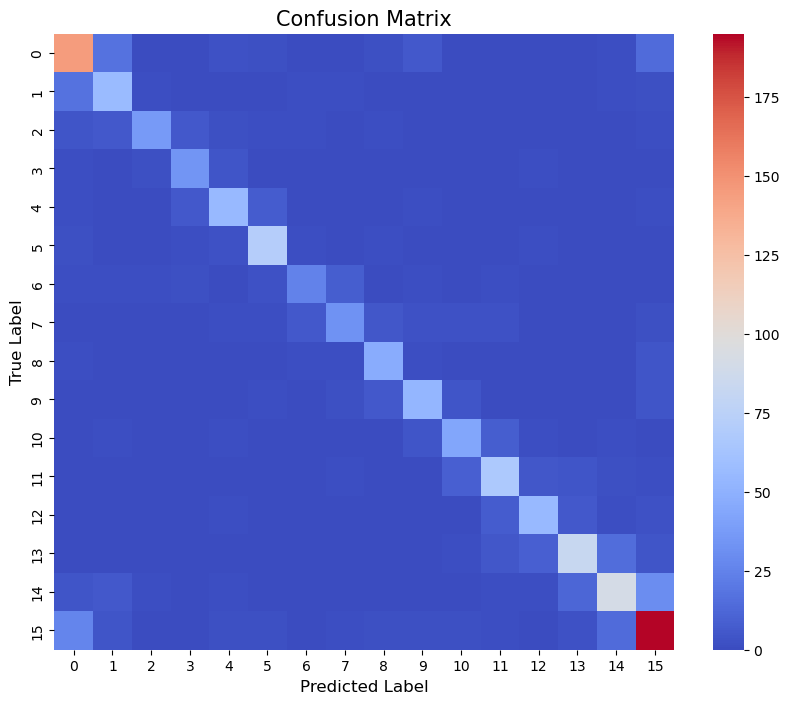

In [5]:
# 绘制热力图
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap="coolwarm", cbar=True, xticklabels=np.arange(16), yticklabels=np.arange(16))
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

In [6]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_list, test_preds))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       190
           1       0.62      0.71      0.66        79
           2       0.88      0.63      0.73        59
           3       0.69      0.81      0.75        42
           4       0.75      0.77      0.76        71
           5       0.81      0.89      0.85        80
           6       0.71      0.58      0.64        43
           7       0.70      0.57      0.63        56
           8       0.73      0.85      0.79        55
           9       0.75      0.76      0.75        70
          10       0.69      0.73      0.71        59
          11       0.72      0.75      0.74        89
          12       0.75      0.75      0.75        73
          13       0.77      0.71      0.74       117
          14       0.72      0.62      0.67       147
          15       0.75      0.77      0.76       254

    accuracy                           0.73      1484
   macro avg       0.74   